In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
# Replace this with your actual data loading step
df = pd.read_csv("../data/labeled/participant_6B_labeled_features.csv")  # or however you get your TEMP feature set

# Only select TEMP features
temp_features = ['temp_mean', 'temp_std', 'temp_min', 'temp_max', 'temp_range']
df_temp = df[temp_features]

/var/folders/db/q9dh3w413z9ffr2zhjp59mf80000gn/T/ipykernel_1850/1938302231.py:2: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/labeled/participant_6B_labeled_features.csv")  # or however you get your TEMP feature set


In [9]:
correlation_matrix = df_temp.corr(method='pearson')  # or use 'spearman' for non-linear
print(correlation_matrix)

            temp_mean  temp_std  temp_min  temp_max  temp_range
temp_mean    1.000000  0.068422  0.999022  0.999493    0.073842
temp_std     0.068422  1.000000  0.026179  0.097841    0.989321
temp_min     0.999022  0.026179  1.000000  0.997366    0.031123
temp_max     0.999493  0.097841  0.997366  1.000000    0.103537
temp_range   0.073842  0.989321  0.031123  0.103537    1.000000


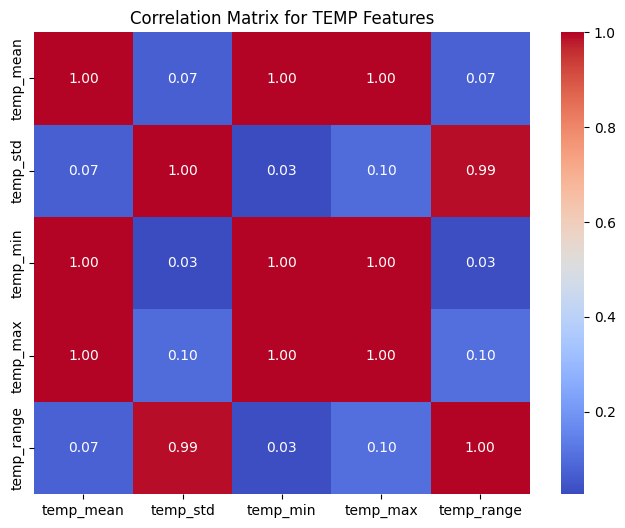

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for TEMP Features")
plt.show()


In [15]:
X = df[temp_features]  # or df_temp


X_cleaned = X.dropna()
X_scaled = scaler.fit_transform(X_cleaned)
X_scaled = scaler.fit_transform(X)
scaler = StandardScaler()

In [16]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(temp_features))],
            y=pca.explained_variance_ratio_,
            palette='Blues_d')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Components')
plt.title('Explained Variance by PCA Components')
plt.show()


In [ ]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(len(temp_features))],
                        index=temp_features)

print(loadings)


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("PCA Loadings for TEMP Features")
plt.show()
